# Исследование объявлений о продаже квартир

В распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.  
•	airports_nearest — расстояние до ближайшего аэропорта в метрах (м)  
•	balcony — число балконов  
•	ceiling_height — высота потолков (м)  
•	cityCenters_nearest — расстояние до центра города (м)  
•	days_exposition — сколько дней было размещено объявление (от публикации до снятия)  
•	first_day_exposition — дата публикации  
•	floor — этаж  
•	floors_total — всего этажей в доме  
•	is_apartment — апартаменты (булев тип)  
•	kitchen_area — площадь кухни в квадратных метрах (м²)  
•	last_price — цена на момент снятия с публикации  
•	living_area — жилая площадь в квадратных метрах (м²)  
•	locality_name — название населённого пункта  
•	open_plan — свободная планировка (булев тип)  
•	parks_around3000 — число парков в радиусе 3 км  
•	parks_nearest — расстояние до ближайшего парка (м)  
•	ponds_around3000 — число водоёмов в радиусе 3 км  
•	ponds_nearest — расстояние до ближайшего водоёма (м)  
•	rooms — число комнат  
•	studio — квартира-студия (булев тип)  
•	total_area — площадь квартиры в квадратных метрах (м²)  
•	total_images — число фотографий квартиры в объявлении  


## Изучение данных из файла
Изучим предоставленные данные.

In [1]:
#Импортируем необходимые библиотеки и файл с данными.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') #Импортируем данные.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Вывод
В предоставленных данных информация о 23699 квартирах, описанных по 22 критериям. Сразу видно, что во многих столбцах присутсвуют пропуски, и не во всех столбцах типы данных соответствуют заявленным. Необходимо обработать и подготовить данные, прежде чем переходить к анализу.

## Предобработка данных

- Дубликатов в данных нет.

- Многие столбцы содержат пропуски.    

- Заменим пропуски в столбцах 'ceiling_height', 'floors_total', 'living_area' и 'kitchen_area', 'airports_nearest', 'cityCenters_nearest', 'parks_nearest', 'ponds_nearest', 'days_exposition' медианным значением по столбцу, так как отсутсвие таких критериев у квартиры невозможно, наличие пропуска нельзя объяснить никакими другими факторами, кроме как механической ошибкой при заполнении данных. Медианное значение больше всего подходит для заполнение прпоусков в данных столбцах, так как не зависит от сильно выделяющихся значений, например, от слишком больших или очень маленьких квартир так, как от них зависит среднее арифметическое.  

- Присутсвует огромное количество пропусков в столбце 'is_apartment'. Подсчет значений False и True в столбце показал, что апартаментов в датасете очень мало. Соответсвенно, можно предположить, что владельцы апартаментов ставили в данной графе True, в то время как большинство владельцев квартир другого типа просто пропускали данную графу. Таким образом, все пропуски в данном столбце можно заменить на False.  

- Пропуски в столбцах 'balcony', 'parks_around3000', 'ponds_around3000'  можно объяснить отсутствием балконов в квартире, отсутствием парков и водоемов поблизости. Соответсвенно, пропуски в данных столбцах можно заменить на 0.  

- Пропуски в столбце 'locality_name', невозможно заменить каким-то средним значением, изменим пропуски в данном столбце на 'Неизвестно'.  

In [4]:
data.duplicated().sum() #Проверяем данные на наличие дубликатов

0

In [5]:
print(data.isna().sum()) #Проверяем, в каких столбцах есть пропуски

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


In [6]:
#Заполняем пропуски в столбцах медианным значением по столбцу.
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].median())
data['living_area'] = data['living_area'].fillna(data['living_area'].median())
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())
data['airports_nearest'] = data['airports_nearest'].fillna(data['airports_nearest'].median())
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(data['cityCenters_nearest'].median())
data['parks_nearest'] = data['parks_nearest'].fillna(data['parks_nearest'].median())
data['ponds_nearest'] = data['ponds_nearest'].fillna(data['ponds_nearest'].median())
data['days_exposition'] = data['days_exposition'].fillna(data['days_exposition'].median())

In [7]:
data.groupby('is_apartment')['is_apartment'].count() #Проверяем количество значений в столбце.
data['is_apartment'] = data['is_apartment'].fillna(False) #Заполняем пропуски популярным значением.
data['balcony'] = data['balcony'].fillna(0) #Заполняем пропуски необходимым значением.
data['parks_around3000'] = data['parks_around3000'].fillna(0) #Заполняем пропуски необходимым значением.
data['ponds_around3000'] = data['ponds_around3000'].fillna(0) #Заполняем пропуски необходимым значением.
data['locality_name'] = data['locality_name'].fillna('Неизвестно') #Заполняем пропуски необходимым значением.

In [8]:
print(data.isna().sum()) #Проверяем, заполнились ли пропуски.

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
dtype: int64


Необходимо заменить тип данных float на int в столбцах 'floors_total', 'balcony', 'parks_around3000', 'ponds_around3000', 'days_exposition', так как значения в данных столбцах измеряются целыми числами.   
Также для возможности расчетов необходимо привести значения в столбце 'first_day_exposition' к типу данных datetime, так как данный столбец содержит даты.

In [9]:
data.dtypes #Проверяем типы данных в столбцах.

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

In [10]:
#Переводим дробные значения в столбцах в целые и строковый тип данных в дату.
data['floors_total'] = data['floors_total'].astype('int')
data['balcony'] = data['balcony'].astype('int')
data['parks_around3000'] = data['parks_around3000'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')
data['days_exposition'] = data['days_exposition'].astype('int')
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S')

In [11]:
print(data['first_day_exposition'].head())
data.dtypes

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]


total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000                 int64
parks_nearest                  float64
ponds_around3000                 int64
ponds_nearest                  float64
days_exposition                  int64
dtype: object

## Расчёты и добавление результатов в таблицу

Добавим в таблицу столбец со стоимостью одного квадратного метра.

In [12]:
data['price_per_square_meter'] = data['last_price'] / data['total_area']

Добавим в таблицу столбцы с днем недели, месяцем и годом публикации.

In [13]:
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year
data['weekday'] = data['first_day_exposition'].dt.weekday

Добавим столбец с делением этажей на первый, последний и другой.

In [14]:
def floor_category(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_category'] = data.apply(floor_category, axis=1)

Добавим столбец с соотношением жилой и общей площади и столбец с отношением площади кухни к общей площади.

In [15]:
data['living_to_total_area'] = data['living_area'] / data['total_area']
data['kitchen_to_total_area'] = data['kitchen_area'] / data['total_area']

## Исследовательский анализ данных

Посмотрим на разброс квартир по площади. Большая часть квартир 40-70 квадратных метров. 

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

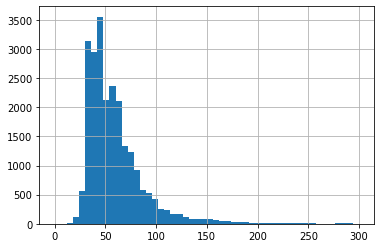

In [16]:
data['total_area'].hist(bins=50, range=(0, 300))
data['total_area'].describe()

Посмотрим на разброс квартир по ценам. Медианная цена сильно отличается от средней. На графике видно большое скопление квартир от 1 до 7 млн, а затем идет небольшое количество дорогих квартир, которые сильно влияют на среднюю цену. Тем не менее цена большинства квартир находится в диапазоне от 3 до 7 млн.

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

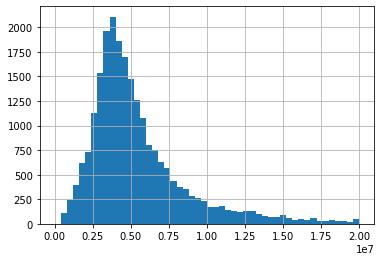

In [17]:
data['last_price'].hist(bins=50, range=(0, 20000000))
data['last_price'].describe()

Посмотрим на разброс квартир по числу комнат. В данных по числу комнат присутсвуют аномальные значения - квартиры с 0 комнат. Можно предположить, что это студии или открытые пространства. Заменим 0 в столбце с числом комнат на 1. Среднее число комнат в квартирах 1-3. При этом значений дальше этого диапазона очень мало, и они практически не влияют на статистику.

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

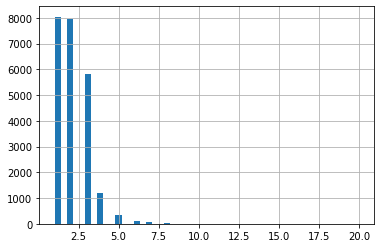

In [18]:
data['rooms'].hist(bins=50, range=(1, 20))
data['rooms'].describe()

Посмотрим на разброс квартир по числу потолков. У подавляющего числа квартир высота потолков находится в диапазоне от 2,5 до 3 метров. Особого разброса в данных по этому параметру не наблюдается.

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

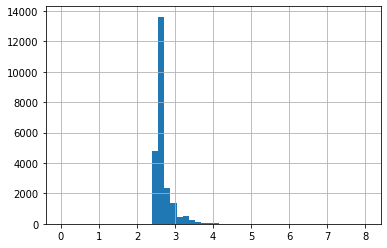

In [19]:
data['ceiling_height'].hist(bins=50, range=(0, 8))
data['ceiling_height'].describe()

Посмотрим на данные с точки зрения времени, которое занимает продажа квартиры. В среднем продажа квартиры занимает около трех месяцев, при это достаточно большое количество квартир продается в первый месяц с момента выставления на продажу. А вот если квартира продается дольше полу года, можно уже говорить, что она продается слишком долго.

count    23699.000000
mean       169.360226
std        206.535633
min          1.000000
25%         45.000000
50%         95.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

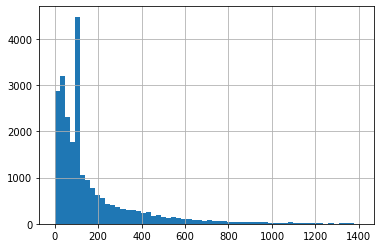

In [20]:
data['days_exposition'].hist(bins=60, range=(0, 1400))
data['days_exposition'].describe()

При анализе площади квартир, цен, высоты потолков и сроках продажи можно заметить, что наблюдается длинная тонкая полоса в большую сторону. То есть много значений концентрируется на значениях до медианного, и мало после. Соответсвенно, квартир с размером площади, высотой потолков, ценой и долгими сроками продажи мало, но их параметры сильно влияют на расчеты. Таким образом, данные по этим квартирам можно считать выбросами, их можно убрать. Получим новый срез данных без выбросов, куда не войдут квартиры площадью более 150 квадратных метров, стоимостью более 12 млн, числом комнат более 5, высотой потолков более 4, и которые продавались долее 800 дней.

In [21]:
#Проверяем, что данные, определенные по графикам как выбросы, занимают не более 10% от всех данных.
#data.query('total_area > 150').count() / data['total_area'].count()
#data.query('last_price > 12000000').count() / data['last_price'].count()
#data.query('rooms > 5').count() / data['rooms'].count()
#data.query('ceiling_height > 4').count() / data['ceiling_height'].count()
#data.query('days_exposition > 800').count() / data['last_price'].count()

In [22]:
#Получаем новый датафрейм без выбросов.
good_data = data.query('total_area <= 150')
good_data = good_data.query('last_price <= 12000000')
good_data = good_data.query('rooms <= 5')
good_data = good_data.query('ceiling_height <= 4')
good_data = good_data.query('days_exposition <= 800')

Изучим, какие факторы больше всего влияют на цену. Судя по таблице корреляции, больше всего на цену влияет площадь квартиры и площадь жилой зоны в квартире. Также влияет количество комнат и площадь кухни.

In [23]:
good_data.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,month,year,weekday,living_to_total_area,kitchen_to_total_area
total_images,1.000000,0.163267,0.102406,0.079269,0.017044,0.015396,0.082302,0.031502,0.013069,-0.028289,...,-0.002641,-0.000545,-0.001612,-0.029141,0.121972,0.007354,0.144636,-0.009847,-0.029560,-0.051673
last_price,0.163267,1.000000,0.706710,0.452603,0.365683,0.187636,0.560678,0.131247,0.022096,-0.069398,...,0.043356,0.289498,-0.005462,0.045399,0.613641,0.002514,0.012947,-0.011511,-0.076078,-0.185609
total_area,0.102406,0.706710,1.000000,0.803911,0.283422,-0.041870,0.877299,-0.041679,0.016153,-0.114503,...,0.005913,0.122661,-0.007815,0.089356,-0.078895,0.007153,-0.055066,-0.007375,0.061822,-0.481936
rooms,0.079269,0.452603,0.803911,1.000000,0.104130,-0.238593,0.854505,-0.180624,-0.008691,-0.169249,...,-0.019784,0.047020,0.000081,0.067746,-0.226727,-0.003042,-0.032319,-0.000992,0.337078,-0.671584
ceiling_height,0.017044,0.365683,0.283422,0.104130,1.000000,-0.029723,0.223275,-0.021861,0.056563,0.016100,...,-0.034611,0.184814,-0.046417,0.050712,0.206003,-0.004653,-0.038785,-0.012415,-0.047924,0.039261
floors_total,0.015396,0.187636,-0.041870,-0.238593,-0.029723,1.000000,-0.181416,0.672920,-0.019379,0.071937,...,0.045362,-0.028437,0.022941,-0.038991,0.340566,0.017144,0.000246,0.013344,-0.293740,0.361255
living_area,0.082302,0.560678,0.877299,0.854505,0.223275,-0.181416,1.000000,-0.140150,0.006496,-0.072436,...,-0.017779,0.089477,-0.003528,0.077858,-0.154313,-0.002136,-0.045863,-0.001252,0.490343,-0.604971
floor,0.031502,0.131247,-0.041679,-0.180624,-0.021861,0.672920,-0.140150,1.000000,-0.011861,0.037762,...,0.035249,-0.019839,0.019300,-0.031216,0.250761,0.020821,0.000337,0.012241,-0.213922,0.255593
is_apartment,0.013069,0.022096,0.016153,-0.008691,0.056563,-0.019379,0.006496,-0.011861,1.000000,-0.003267,...,-0.012154,0.007986,0.014814,-0.000850,0.014822,-0.011754,0.021735,-0.010706,-0.003368,0.010461
studio,-0.028289,-0.069398,-0.114503,-0.169249,0.016100,0.071937,-0.072436,0.037762,-0.003267,1.000000,...,0.002383,-0.005686,-0.001185,-0.024418,0.047813,0.000535,0.011513,-0.002618,0.098802,0.174948


Посмотрим внимательнее, как площадь квартиры влияет на ее стоимость. Очевидно, что чем больше площадь квартиры, тем дороже она должна стоить. Однако, график демонстрирует достаточно среднюю корреляцию. Таким образом, просто площадь квартиры не является решающим фактором при определении ее цены.

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

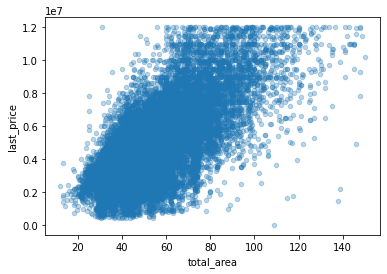

In [24]:
good_data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.3)

Посмотрим внимательнее на зависимость цены от количества комнат в квартире. На графике видно, что минимальная цена увеличивается по мере увеличения количества комнат в квартире. Соответсвенно, можно говорить о некоторой положительной корреляции между этими двумя параметрами. Однако, максимальная цена у квартир с разным количеством комнат не отличается, значит, эта корреляция невысокая, и количество комнат не является решающим фактором в определении стоимости квартиры.

<AxesSubplot:xlabel='rooms', ylabel='last_price'>

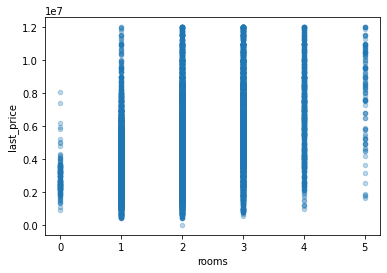

In [25]:
good_data.plot(x='rooms', y='last_price', kind='scatter', alpha=0.3)

Посмотрим внимательнее на зависимость цены от удаленности квартиры от центра города. Удивительно, но график показывает практически полное отсутствие зависимости между двумя данными параметрами.

<AxesSubplot:xlabel='cityCenters_nearest', ylabel='last_price'>

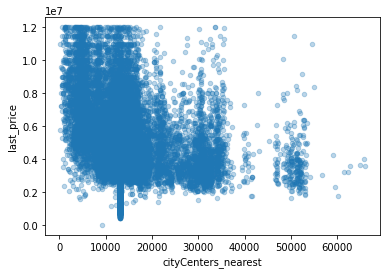

In [26]:
good_data.plot(x='cityCenters_nearest', y='last_price', kind='scatter', alpha=0.3)

Посмотрим, как цена зависит от этажа, на котором находится квартира. Как видно по графику, то, что квартира находится на первом этаже, значительно уменьшает ее стоимость, как и то, что квартира находится на последнем этаже. Наиболее дорогие квартиры находятся не на первом, и не на последнем этаже.

<AxesSubplot:xlabel='floor_category', ylabel='last_price'>

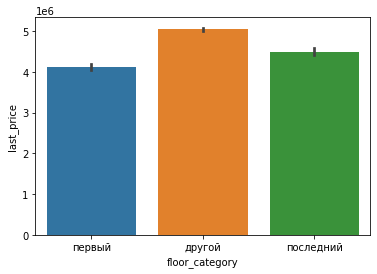

In [27]:
sns.barplot(x='floor_category', y='last_price', data=good_data)

Посмотрим, как цена зависит от дня недели, месяца и года размещения объявления. По графикам видно, что день недели и месяц размещения объявления о продаже никак не влияет на цену. При этом наблюдается резкое падения стоимости квартир после 2014 года.

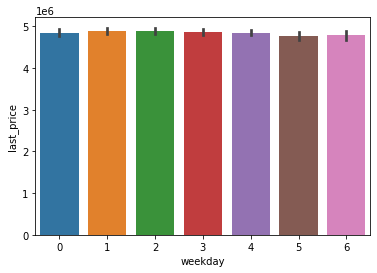

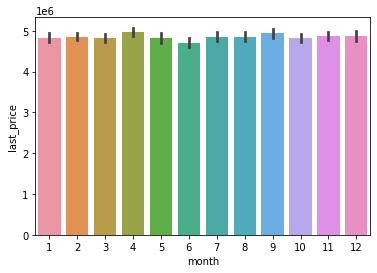

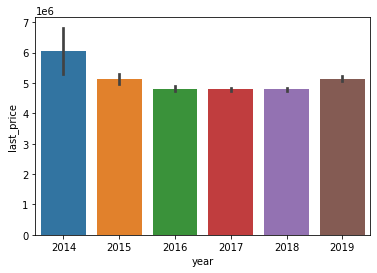

In [28]:
sns.barplot(x='weekday', y='last_price', data=good_data)
plt.show()
sns.barplot(x='month', y='last_price', data=good_data)
plt.show()
sns.barplot(x='year', y='last_price', data=good_data)
plt.show()

Выделим населенные пункты с наибольшим числом объявлений. Самые дорогие квартиры в Санкт-Петербурге, Пушкине, Кудрово и Парголово, а самые дешевые в Выборге и Всеволожске.

<AxesSubplot:xlabel='price_per_square_meter', ylabel='locality_name'>

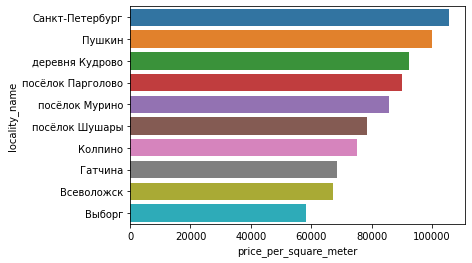

In [29]:
list_top10 = good_data.groupby('locality_name')['locality_name'].count().sort_values(ascending=False).head(10)
spb_mean = good_data.query('locality_name == "Санкт-Петербург"')['price_per_square_meter'].mean()
murino_mean = good_data.query('locality_name == "посёлок Мурино"')['price_per_square_meter'].mean()
shushary_mean = good_data.query('locality_name == "посёлок Шушары"')['price_per_square_meter'].mean()
vsevolozhsk_mean = good_data.query('locality_name == "Всеволожск"')['price_per_square_meter'].mean()
kolpino_mean = good_data.query('locality_name == "Колпино"')['price_per_square_meter'].mean()
pargolovo_mean = good_data.query('locality_name == "посёлок Парголово"')['price_per_square_meter'].mean()
gatchina_mean = good_data.query('locality_name == "Гатчина"')['price_per_square_meter'].mean()
pushkin_mean = good_data.query('locality_name == "Пушкин"')['price_per_square_meter'].mean()
kudrovo_mean = good_data.query('locality_name == "деревня Кудрово"')['price_per_square_meter'].mean()
vyborg_mean = good_data.query('locality_name == "Выборг"')['price_per_square_meter'].mean()
locality_top10 = pd.DataFrame({'locality_name' : ['Санкт-Петербург', 'посёлок Мурино', 'посёлок Шушары', 'Всеволожск', 'Колпино', 'посёлок Парголово', 'Гатчина', 'Пушкин', 'деревня Кудрово', 'Выборг'], 'price_per_square_meter': [spb_mean, murino_mean, shushary_mean, vsevolozhsk_mean, kolpino_mean, pargolovo_mean, gatchina_mean, pushkin_mean, kudrovo_mean, vyborg_mean]})
locality_top10 = locality_top10.sort_values('price_per_square_meter', ascending=False)
sns.barplot(x='price_per_square_meter', y='locality_name', data=locality_top10)

Определим, границы центра в Санкт-Петербурге. По графику видно, что цены становятся резко ниже при удалении квартиры на 5 и более км от центра. Соответсвенно, можно считать, что все квартиры, которые находятся в радиусе 5 км от центра, находятся в центре.

<AxesSubplot:xlabel='cityCenters_nearest', ylabel='price_for_km'>

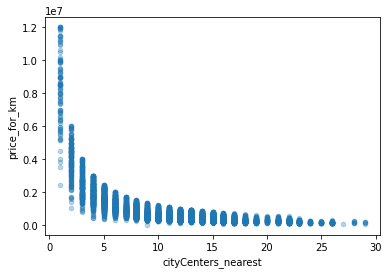

In [30]:
data_spb = good_data.query('locality_name == "Санкт-Петербург"').copy()
data_spb['cityCenters_nearest'] = (data_spb['cityCenters_nearest'] / 1000).round()
data_spb['price_for_km'] = data_spb['last_price'] / data_spb['cityCenters_nearest']
data_spb.plot(x='cityCenters_nearest', y='price_for_km', kind='scatter', alpha=0.3)

Проанализируем квартиры в центре Санкт-Петербурга.

Площадь большинства квартир в центре находится в диапазоне от 40 до 60 квадратных метров. Цены на квартиры в центре выше, чем в других районах, мло квартир дешевле 5 млн, много квартир по 7 млн. Также график прерывается в верхней точке, из чего можно сделать вывод, что самые дорогие квартиры, которые пошли в выбросы, находятся в центре Санкт-Петербурга. В большинстве квартир 2 или 1 комнаты. Высота потолков в основном находится в диапазоне от 2,5 до 3 метров.

count    1527.000000
mean       70.054106
std        24.503364
min        12.000000
25%        51.000000
50%        68.000000
75%        85.500000
max       150.000000
Name: total_area, dtype: float64

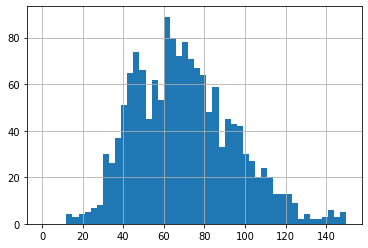

In [31]:
spb_center = data_spb.query('cityCenters_nearest <= 5')
spb_center['total_area'].hist(bins=50, range=(0, 150))
spb_center['total_area'].describe()

Посмотрим, какие параметры влияют на стоимость квартир в центре Санкт-Петербурга.  
Площадь большинства квартир в центре находится в диапазоне от 40 до 60 квадратных метров. Цены на квартиры в центре выше, чем в других районах, мало квартир дешевле 5 млн, стоимость большинства квартир в центре - от 6 млн. Также график прерывается в верхней точке, из чего можно сделать вывод, что самые дорогие квартиры, которые пошли в выбросы, находятся в центре Санкт-Петербурга. В большинстве квартир 2 или 1 комнаты. Высота потолков в основном находится в диапазоне от 2,5 до 3 метров.

In [32]:
spb_center.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,month,year,weekday,living_to_total_area,kitchen_to_total_area,price_for_km
total_images,1.000000,0.099788,-0.005203,-0.005231,0.065760,-0.033583,-0.000450,0.019958,0.011378,-0.039055,...,-0.006480,0.019452,-0.043162,0.092984,0.006194,0.170804,0.032763,-0.038001,0.019241,0.010440
last_price,0.099788,1.000000,0.684094,0.479501,0.161374,0.075860,0.564607,0.128757,-0.024015,-0.116038,...,-0.027527,0.060354,0.070912,0.156783,-0.066907,0.044096,-0.004356,-0.054531,-0.268485,0.443475
total_area,-0.005203,0.684094,1.000000,0.803953,0.179744,-0.133245,0.877484,-0.054060,-0.006679,-0.117101,...,-0.013820,0.024447,0.129397,-0.555144,-0.053827,-0.090172,-0.025611,0.067644,-0.501974,0.301421
rooms,-0.005231,0.479501,0.803953,1.000000,0.152478,-0.237513,0.814053,-0.125883,-0.005855,-0.151593,...,-0.030130,-0.014281,0.097252,-0.544512,-0.040787,-0.052569,-0.034842,0.268340,-0.581639,0.247574
ceiling_height,0.065760,0.161374,0.179744,0.152478,1.000000,-0.225905,0.208973,-0.148791,0.042236,0.002978,...,0.034122,-0.057829,0.000249,-0.067356,-0.043577,0.112559,-0.025703,0.125445,-0.079554,0.117531
floors_total,-0.033583,0.075860,-0.133245,-0.237513,-0.225905,1.000000,-0.222408,0.597593,0.019312,0.007185,...,-0.131570,0.167660,0.001816,0.286752,0.026028,-0.037792,0.014735,-0.253901,0.199929,-0.182500
living_area,-0.000450,0.564607,0.877484,0.814053,0.208973,-0.222408,1.000000,-0.100683,0.018895,-0.085455,...,-0.011609,-0.000952,0.119268,-0.524318,-0.026153,-0.076608,-0.027978,0.467394,-0.568605,0.273049
floor,0.019958,0.128757,-0.054060,-0.125883,-0.148791,0.597593,-0.100683,1.000000,-0.004140,-0.016128,...,-0.094375,0.088309,0.030263,0.231492,0.026600,-0.039795,0.035012,-0.159435,0.092852,-0.073471
is_apartment,0.011378,-0.024015,-0.006679,-0.005855,0.042236,0.019312,0.018895,-0.004140,1.000000,-0.003011,...,0.014250,0.006289,-0.036624,-0.026663,-0.041500,0.032343,-0.055495,0.037520,0.001807,-0.017714
studio,-0.039055,-0.116038,-0.117101,-0.151593,0.002978,0.007185,-0.085455,-0.016128,-0.003011,1.000000,...,-0.001511,0.020622,-0.053540,0.053422,0.006002,0.011638,0.002706,0.048366,0.143170,-0.054104


count    1.527000e+03
mean     7.723158e+06
std      2.211880e+06
min      1.600000e+06
25%      6.100000e+06
50%      7.600000e+06
75%      9.393000e+06
max      1.200000e+07
Name: last_price, dtype: float64

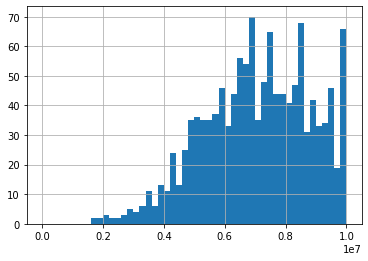

In [33]:
spb_center['last_price'].hist(bins=50, range=(0, 10000000))
spb_center['last_price'].describe()

count    1527.000000
mean        2.470858
std         1.042496
min         0.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: rooms, dtype: float64

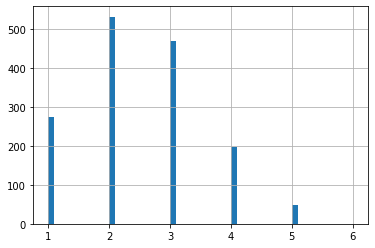

In [34]:
spb_center['rooms'].hist(bins=50, range=(1, 6))
spb_center['rooms'].describe()

count    1527.000000
mean        2.925822
std         0.323140
min         2.400000
25%         2.650000
50%         2.800000
75%         3.150000
max         4.000000
Name: ceiling_height, dtype: float64

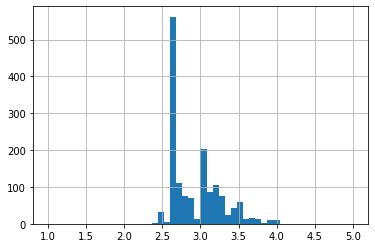

In [35]:
spb_center['ceiling_height'].hist(bins=50, range=(1, 5))
spb_center['ceiling_height'].describe()

Проанализируем, что влияет на цены квартир в центре. Цена резко растет при увеличении количества комнат в квартире. Корреляция между двумя данными параметрами у квартир в центре выше, чем по всей базе. Цена квартир уменьшается по мере удаления от центра даже в рамках самого центра, определенного радиусом в 5 км. Цена на квартиру не зависит от времени размещения объявления ни в центре, ни в общей базе.

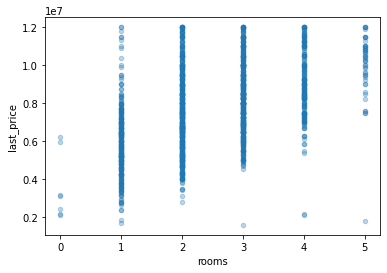

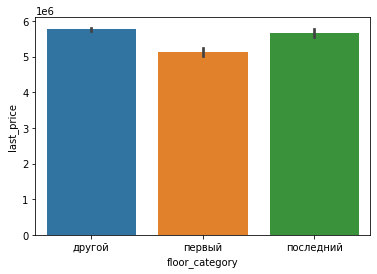

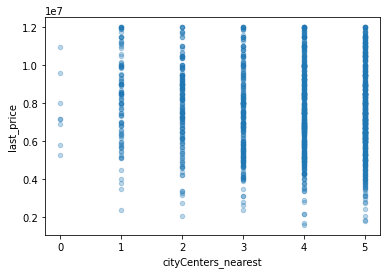

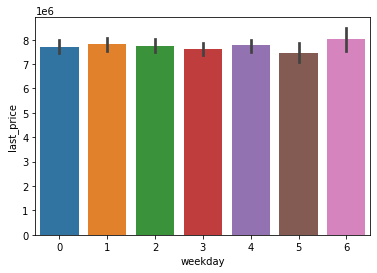

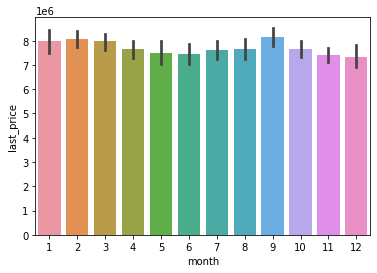

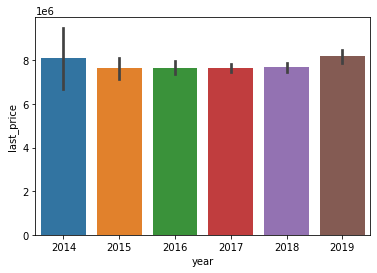

In [36]:
spb_center.plot(x='rooms', y='last_price', kind='scatter', alpha=0.3)
plt.show()
sns.barplot(x='floor_category', y='last_price', data=data_spb)
plt.show()
spb_center.plot(x='cityCenters_nearest', y='last_price', kind='scatter', alpha=0.3)
plt.show()
sns.barplot(x='weekday', y='last_price', data=spb_center)
plt.show()
sns.barplot(x='month', y='last_price', data=spb_center)
plt.show()
sns.barplot(x='year', y='last_price', data=spb_center)
plt.show()

## Общий вывод

С целью создания системы автоматического определения рыночной стоимости квартир, были проанализированы данные о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. 
- Из данных были удалены все пропуски и аномальные значения, откинуты выбросы.
- Были определены основные параметры, влияющие на цену квартиры: площадь квартиры, количество комнат в квартире и этаж, на котором расположена квартира (самые дорогие квартиры не на первом и не на последнем этажах). При этом ни один из этих параметров не коррелирует с ценой достаточно сильно, чтобы можно было говорить, что параметр решающий, важно смотреть на совокупность показателей по нескольким параметрам.
- Рынок квартир был проанализирован по основным параметрам: площадь, цена, количество комнат, высота потолков. Выявлены средние показатели: площадь - 40-70 квадратных метров, цена - 3-7 млн, количество комнат - 1-3 и высота потолков от 2,5 до 3 метров.
- Было выявлено среднее время продажи квартиры - 3 месяца.
- Основными параметрами, влияющими на цену, являются: площадь квартиры, количество комнат и этаж, на котором находится квартир.
- Также цена зависит от того, в каком населенном пункте находится квартира. Самые дорогие квартиры в Санкт-Петербурге, Пушкине, Кудрово и Парголово, а самые дешевые в Выборге и Всеволожске.
- Важным наблюдением является то, что по всем населенным пунктам удаленность от центра никак не влияет на цену, однако, если смотреть на квартиры только в Санкт-Петербурге, удаленность квартиры от центра города является определяющим параметром при определении ее цены. Был определен радиус центра Санкт-Петербурга - 5 км.